# QAOA examples

## Quick Start example

In [10]:
print("* Runs QAOA on built-in Nelder-Mead. Uses a classical/diagonal 3-qubit Hamiltonian. Uses qpp and QAOA-depth = 2 with standard parameter set. Assert checks the optimum eigenstate.")

import qbos_op
qa = qbos_op.QaoaSimple()
qa.qaoa_step = 2
qa.extended_param = False

# Setup the Hamiltonian derived from the cost-function
qa.qn = 3  # 3 qubits
qa.ham = "1.0 + 3.5 Z0 + -5.5 Z1 + -5.9 Z2"
qa.ham[0].append("1.0 + -3.5 Z0 + -5.5 Z1 + -5.9 Z2")

qa.sn = 1024   # 1024 shots
qa.maxeval = 300
qa.theta = qbos_op.ND()
for ii in range(qa.qaoa_step[0][0]*2) :
    qa.theta[0][0][ii] = 0.1   # Initial parameter values
    
qa.run()
assert qa.out_eigenstate[0][0] == "001", "[qbos_op.qaoa()] Failed eigenstate test: 001"
assert qa.out_eigenstate[0][1] == "000", "[qbos_op.qaoa()] Failed eigenstate test: 000"

* Runs QAOA on built-in Nelder-Mead. Uses a classical/diagonal 3-qubit Hamiltonian. Uses qpp and QAOA-depth = 2 with standard parameter set. Assert checks the optimum eigenstate.


## MaxCut for 5-node Graph example

The code below solves MaxCut problem for the 5-node graph.

Note, that the qubit order in the Hamiltonian (qa.ham) is reversed with respect to the original node labelling (elist) (see the figure below). 

![MaxCut_Kite_graph.png](attachment:MaxCut_Kite_graph.png)

There are two correct labellings: 10100 and 01011, which correspond to MaxCut = 4. 

In [11]:
import matplotlib.pyplot as plt
import matplotlib.axes as axes
import numpy as np
import networkx as nx

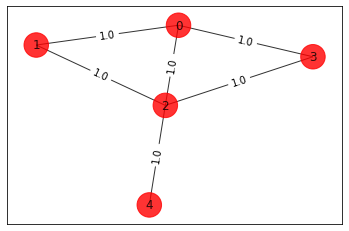

In [12]:
n = 5  # Number of nodes in graph
G = nx.Graph()
G.add_nodes_from(np.arange(0, n, 1))
elist = [(0, 1, 1.0), (0, 2, 1.0), (0, 3, 1.0), (1, 2, 1.0), (2, 3, 1.0), (2, 4, 1.0)]
# tuple is (i,j,weight) where (i,j) is the edge
G.add_weighted_edges_from(elist)

colors = ["r" for node in G.nodes()]
pos = nx.spring_layout(G)


def draw_graph(G, colors, pos):
    default_axes = plt.axes(frameon=True)
    nx.draw_networkx(G, node_color=colors, node_size=600, alpha=0.8, ax=default_axes, pos=pos)
    edge_labels = nx.get_edge_attributes(G, "weight")
    nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=edge_labels)


draw_graph(G, colors, pos)

In [13]:
print("* Runs QAOA on built-in Nelder-Mead. Uses a classical/diagonal 3-qubit Hamiltonian.  Uses aer and QAOA-depth = 3 with extended parameter set.  Assert checks the optimum eigenstate.")

import qbos_op
qa = qbos_op.QaoaSimple()
qa.qn = 5
qa.ham = "0.5 Z0 Z2 + 0.5 Z1 Z2 + 0.5 Z2 Z3 + 0.5 Z1 Z4 + 0.5 Z2 Z4 + 0.5 Z3 Z4"
qa.extended_param = True

qa.acc='qpp'
qa.functol[0][0][0]=1e-5
qa.maxeval=800
qa.qaoa_step=3
# Set up parameters (number of qubits + number of Pauli terms in Hamiltonian (non-Identity))*3 qaoa steps
qa.theta[0][0]=qbos_op.ND()
for ii in range((qa.qn[0][0] + 6)*qa.qaoa_step[0][0]): 
    qa.theta[0][0][ii] = 0.25

qa.run()
print('cost ' + str(qa.out_energy[0][0][0]))
print('eigenstate ' + str(qa.out_eigenstate[0][0]))

* Runs QAOA on built-in Nelder-Mead. Uses a classical/diagonal 3-qubit Hamiltonian.  Uses aer and QAOA-depth = 3 with extended parameter set.  Assert checks the optimum eigenstate.
cost -1.74609375
eigenstate 10100


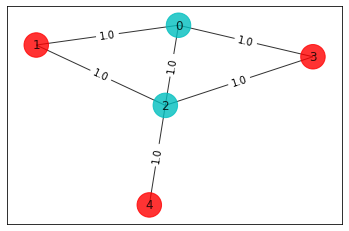

In [14]:
colors = ["r" if qa.out_eigenstate[0][0][i] == "0" else "c" for i in range(len(qa.out_eigenstate[0][0]))]
draw_graph(G, colors, pos)